### Importing the libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

### Importing the ldatasets

In [3]:
features = pd.read_table('features.txt', delim_whitespace=True, names=('Name',))

In [4]:
X = pd.read_table('X_train.txt', delim_whitespace=True, names=range(561))
X.columns = list(features['Name'])
print(X.shape)
X.head()

(7352, 561)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
y = pd.read_table('y_train.txt', delim_whitespace=True, names=('Label',))
y = y-1
print(y.shape)
y.head()

(7352, 1)


,Label
0,4
1,4
2,4
3,4
4,4


In [51]:
public_x = pd.read_table('X_test.txt', delim_whitespace=True, names=range(561))
public_x.columns = list(features['Name'])
public_x.shape

(2947, 561)

In [7]:
public_y = pd.read_table('y_test.txt', delim_whitespace=True, names=('Label',))
public_y = public_y - 1
public_x.shape

(2947, 561)

In [53]:
X.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [54]:
y.isnull().sum()

Label    0
dtype: int64

### Dividing the training set into 3 parts as private datasets

In [8]:
frames = [X,y]
df = pd.concat(frames, axis=1)

In [52]:
df.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Label                                   0
Length: 562, dtype: int64

In [27]:
part_1 = df.sample(frac = (1/3)) 
rest_part = df.drop(part_1.index) 
part_2 = rest_part.sample(frac = 0.5) 
part_3 = rest_part.drop(part_2.index)

### Private models development

In [28]:
#model1

X1 = part_1.drop(axis=1, columns='Label')
Y1 = part_1.iloc[:, -1].values

X1 = StandardScaler().fit_transform(X1)

X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)
model1 = Sequential()
model1.add(tf.keras.Input(shape=(X_Train1.shape[1],)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(6, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model1.fit(X_Train1, Y_Train1, batch_size=40, epochs=20)
w1 = model1.get_weights()

y_pred1 = model1.predict_classes(X_Test1)
model1.evaluate(X_Test1, Y_Test1)
a1 = 100*accuracy_score(Y_Test1, y_pred1)
print(a1)

Epoch 1/20
1960/1960 [==============================] - 1s 458us/sample - loss: 0.7759 - accuracy: 0.6806
Epoch 2/20
1960/1960 [==============================] - 0s 213us/sample - loss: 0.2494 - accuracy: 0.9051
Epoch 3/20
1960/1960 [==============================] - 0s 198us/sample - loss: 0.1637 - accuracy: 0.9347
Epoch 4/20
1960/1960 [==============================] - 0s 198us/sample - loss: 0.1166 - accuracy: 0.9561
Epoch 5/20
1960/1960 [==============================] - 0s 199us/sample - loss: 0.0853 - accuracy: 0.9658
Epoch 6/20
1960/1960 [==============================] - 0s 214us/sample - loss: 0.0659 - accuracy: 0.9770
Epoch 7/20
1960/1960 [==============================] - 0s 200us/sample - loss: 0.0833 - accuracy: 0.9709
Epoch 8/20
1960/1960 [==============================] - 0s 206us/sample - loss: 0.0627 - accuracy: 0.9755
Epoch 9/20
1960/1960 [==============================] - 0s 200us/sample - loss: 0.0427 - accuracy: 0.9842
Epoch 10/20
1960/1960 [=======================

In [29]:
#model2

X2 = part_2.drop(axis=1, columns='Label')
Y2 = part_2.iloc[:, -1].values

X2 = StandardScaler().fit_transform(X2)

X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X2, Y2, test_size = 0.20, random_state = 0)
model2 = Sequential()
model2.add(tf.keras.Input(shape=(X_Train2.shape[1],)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model2.fit(X_Train2, Y_Train2, batch_size=40, epochs=20)
w2 = model2.get_weights()

y_pred2 = model2.predict_classes(X_Test2)
model2.evaluate(X_Test2, Y_Test2)
a2 = 100*accuracy_score(Y_Test2, y_pred2)
print(a2)

Epoch 1/20
1960/1960 [==============================] - 1s 444us/sample - loss: 0.7861 - accuracy: 0.6832
Epoch 2/20
1960/1960 [==============================] - 0s 202us/sample - loss: 0.2587 - accuracy: 0.9010
Epoch 3/20
1960/1960 [==============================] - 0s 202us/sample - loss: 0.1734 - accuracy: 0.9327
Epoch 4/20
1960/1960 [==============================] - 0s 200us/sample - loss: 0.1144 - accuracy: 0.9536
Epoch 5/20
1960/1960 [==============================] - 0s 199us/sample - loss: 0.0970 - accuracy: 0.9633
Epoch 6/20
1960/1960 [==============================] - 0s 203us/sample - loss: 0.0708 - accuracy: 0.9730
Epoch 7/20
1960/1960 [==============================] - 0s 204us/sample - loss: 0.0717 - accuracy: 0.9673
Epoch 8/20
1960/1960 [==============================] - 0s 201us/sample - loss: 0.0521 - accuracy: 0.9801
Epoch 9/20
1960/1960 [==============================] - 0s 198us/sample - loss: 0.0332 - accuracy: 0.9898
Epoch 10/20
1960/1960 [=======================

In [30]:
#model3

X3 = part_3.drop(axis=1, columns='Label')
Y3 = part_3.iloc[:, -1].values

X3 = StandardScaler().fit_transform(X3)

X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X3, Y3, test_size = 0.20, random_state = 0)
model3 = Sequential()
model3.add(tf.keras.Input(shape=(X_Train3.shape[1],)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model3.fit(X_Train3, Y_Train3, batch_size=40, epochs=20)
w3 = model3.get_weights()

y_pred3 = model3.predict_classes(X_Test3)
model3.evaluate(X_Test3, Y_Test3)
a3 = 100*accuracy_score(Y_Test3, y_pred3)
print(a3)

Epoch 1/20
1960/1960 [==============================] - 1s 445us/sample - loss: 0.8330 - accuracy: 0.6673
Epoch 2/20
1960/1960 [==============================] - 0s 203us/sample - loss: 0.2624 - accuracy: 0.9056
Epoch 3/20
1960/1960 [==============================] - 0s 201us/sample - loss: 0.1462 - accuracy: 0.9531
Epoch 4/20
1960/1960 [==============================] - 0s 213us/sample - loss: 0.1043 - accuracy: 0.9689
Epoch 5/20
1960/1960 [==============================] - 0s 204us/sample - loss: 0.1027 - accuracy: 0.9638
Epoch 6/20
1960/1960 [==============================] - 0s 198us/sample - loss: 0.1283 - accuracy: 0.9541
Epoch 7/20
1960/1960 [==============================] - 0s 211us/sample - loss: 0.0641 - accuracy: 0.9760 - loss: 0.0943 - ac
Epoch 8/20
1960/1960 [==============================] - 0s 206us/sample - loss: 0.0580 - accuracy: 0.9796
Epoch 9/20
1960/1960 [==============================] - 0s 199us/sample - loss: 0.0456 - accuracy: 0.9806
Epoch 10/20
1960/1960 [===

### Averaging weights using weight function

In [31]:
# Weight function
amax = max(a1,a2,a3)
if(amax==a1):
    c1=9
    bmax = max(a2,a3)
    if(bmax==a2):
        c2=5
        c3=1
    else:
        c2=1
        c3=5
if(amax==a2):
    c2=9
    bmax = max(a1,a3)
    if(bmax==a1):
        c1=5
        c3=1
    else:
        c1=1
        c3=5
if(amax==a3):
    c3=9
    bmax = max(a2,a1)
    if(bmax==a2):
        c2=5
        c1=1
    else:
        c1=1
        c2=5
W = [(c1*a + c2*b + c3*c)/15  for a, b, c in zip(w1, w2, w3)]

### Passing parameters to global model and testing on public dataset

In [35]:
#main model
p = public_x
py = public_y.values

px = StandardScaler().fit_transform(p)

public_x_train, public_x_test, public_y_train, public_y_test = train_test_split(px, py, test_size = 0.20, random_state = 0)

model = Sequential()
model.add(tf.keras.Input(shape=(public_x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.set_weights(W)

y_pred = model.predict_classes(public_x_test)
model.evaluate(public_x_test, public_y_test)

print(accuracy_score(public_y_test, y_pred))
cf = confusion_matrix(public_y_test, y_pred)

590/590 [==============================] - 0s 683us/sample - loss: 0.6935 - accuracy: 0.9424
0.9423728813559322


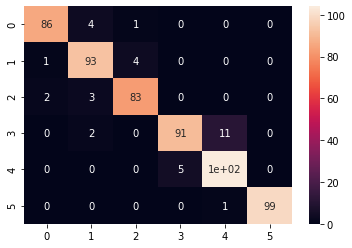

In [48]:
sns.heatmap(cf, annot=True)